# Tutorial: Using omterms keyword extraction package

Bulent Ozel, UZH

```bulent.ozel@gmail.com```

-------------

The first objective of this module is to provide customizable and standardized text preprocessing phase prior to further analyses where more advanced machine learning and or statistical techniques can be applied and compared with each other. In that sense, it  provides a pipelined set of functionalities (i) to be able to inspect, organize, prune and merge texts around **one or very few specific theme(s) or topic(s)**, (ii) remove unwanted terms or literals from the texts, (iii) tokenize the texts, (iv) count the terms in texts, and (v) when desired stem the tokenized terms.

The second objective of this module is to be able compare or score a foreground corpus or a specific corpus against a background corpus or reference corpus. Example use cases could be, for instance, exploring the language of a sub-culture, a community, or a movement looking at to what extend the specific use of the language of the group differentiates itself from the common language. 

In cases when there are more than a few number of themes or topics, and where each topic is represented with a large set of documents that validates the employment of standardized matrix decomposition based methodologies, then the scoring option of this module can be skipped entirely. More specifically, in use cases where the objective is being able to classify and differentiate a number of topics or issues from each other and where there are sufficient data that fulfills the underlining assumptions of NMF, LDA or LSI based approaches, then tools, for instance, from Python’s sklearn.decomposition package are suggested.

Nevertheless, the outputs of this module such as normalized term frequencies or the specificity scores associated to them with respect to a reference background corpus can be used as input to other matrix decomposition techniques.

For a general introduction on keyword and keyphrase extraction see the [readme file.](https://github.com/bulentozel/omterms/blob/master/README.md)

-----

## Quick Use

In [1]:
import omterms
from omterms.interface import *

extract_terms("Some input X text to process less then 3 seconds.").head()

Configuring the text cleaner ...
A single text is provided.
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 10
Cleaning process: Initial size of tokens = 10
Reduction due to punctuations and stopwords = 3.
Reduction due to all numeral terms = 1
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 5
Percentage = 50%
COMPLETED.


,TF,Term,wTF
0,1,input,0.2
1,1,text,0.2
2,1,process,0.2
3,1,less,0.2
4,1,seconds,0.2


---------------------------------------

## More detailed examples: the application interface options

The application interface provides an encapsualtion and standardization at preparing a set of texts for further analyses. The standardized term extraction process covers tokenization, counting both raw and normalized term occurances, cleaning, stemming(optional), and scoring(optional) choices. The tabulated output can be exported in .csv file format and/or Pandas dataframe format.

A varying number of input data formats is supported including their previously tokenized and cleaned versions. For the details on input parameters and types please see docstring documentation.


---------------------------------------

In [2]:
help(omterms.interface)

Help on module omterms.interface in omterms:

NAME
    omterms.interface - OpenMaker term extraction application interface.

DESCRIPTION
    Author: Bulent Ozel
    e-mail: bulent.ozel@gmail.com
    
    The application interface provides an encapsualtion and standardization at preparing a set of texts for
    further analyses. The standardized term extraction process covers tokenization, counting both raw and 
    normalized, cleaning, stemming(optional), and scoring(optional) chioices. The tabulated output can be
    exported in .csv file format and/or Pandas dataframe format.
    
    The input text(s) can be provided in any of the following formats:
    - raw text
    - tokenized text
    - tokenized and counted
    
    In the same manner if a background courpus based scoring is desired then the reference corpus
    can be provided in any of the above formats. Depending on the desired actions on the input text,
    the output may contain not only raw and normalized term frequency 

In [3]:
help(extract_terms)

Help on function extract_terms in module omterms.interface:

extract_terms(texts, tokenizer=<function tokenize_strip_non_words at 0x1111e8d08>, merge=False, min_termlength=1, min_tf=1, topics=[], extra_process=[], stemmer=<bound method PorterStemmer.stem of <PorterStemmer>>, refcorpus=None, export=False, basefname='omterms.csv', outputdir='./output/', notallowed_symbols=".,():;!?\n`'=+/\\[]}{|><@#$%^&*_‘’“”.", nonremovable_terms='./data/specifics_openmaker.txt', file_standard_stopwords='./data/stopwords_standard.txt', file_specific_sopwords='./data/stopwords_openmaker.txt', regression_threshold=1.0)
    Term extraction modules main driver function.
    
    Args:
        texts (:obj:`str` or :obj:`dict` of `str` or  :obj:`omterms.WikiArticles`):
        The input text can be any of the following:
                - a string,
                - or a dictionary of strings where the key denotes the topic 
                    or any desired label/annotation regarding the text,
              

### Working with plain texts or already tokenized texts: 

In [4]:
texta = """The first objective of this module is to provide customizable and standardized text 
preprocessing phase prior to further analyses where more advanced machine learning and or statistical 
techniques can be applied and compared with each other. In that sense, it provides a pipelined set of 
functionalities (i) to be able to inspect, organize, prune and merge texts around one or very few specific 
theme(s) or topic(s), (ii) remove unwanted terms or literals from the texts, (iii) tokenize the texts, 
(iv) count the terms in texts, and (v) when desired stem the tokenized terms."""

textb = """The second objective of this module is to be able compare or score a foreground corpus or a 
specific corpus against a background corpus or reference corpus. Example use cases could be, for instance, 
exploring the language of a sub-culture, a community, or a movement looking at to what extend the specific 
use of the language of the group differentiates itself from the common language.
"""

textc = """In cases when there are more than a few number of themes or topics, and where each topic is 
represented with a large set of documents that validates the employment of standardized matrix decomposition 
based methodologies, then the scoring option of this module can be skipped entirely. More specifically, 
in use cases where the objective is being able to classify and differentiate a number of topics or issues 
from each other and where there are sufficient data that fulfills the underlining assumptions of NMF, LDA
or LSI based approaches, then tools, for instance, from Python’s sklearn.decomposition package are suggested.
"""

textd = """Nevertheless, the outputs of this module such as normalized term frequencies or the specificity
scores associated to them with respect to a reference background corpus can be used as input to other matrix 
decomposition techniques.
"""

texts = {'a':texta, 'b':textb, 'c':textc, 'd':textd}
textref = ' * '.join([texta,textc,textd])
tokensref = run_tokenizing_process(textref, TOKENIZER_FUNC)

Tokenizing the input text ..
Done. Number of terms: 230


In [5]:
df = extract_terms(texta)

Configuring the text cleaner ...
A single text is provided.
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 54
Percentage = 57%
COMPLETED.


In [6]:
df.head()
# Note that TF stands for term frequency count wTF is TF/nwords in the input text.

,TF,Term,wTF
27,4,texts,0.086957
34,3,terms,0.065217
0,1,objective,0.021739
1,1,module,0.021739
2,1,provide,0.021739


#### Exporting the table  to a specific location and file name.

In [7]:
df = extract_terms(texta, export = True, outputdir = './output/', basefname= 'mytable.csv')

Configuring the text cleaner ...
A single text is provided.
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 54
Percentage = 57%
COMPLETED.
Results are exported to file: ./output/mytable.csv


#### Extracting terms from a set of texts

In [8]:
df = extract_terms(texts, export=True)

Configuring the text cleaner ...

Processing each topic ::>

Topic = a
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 54
Percentage = 57%
COMPLETED.
Results are exported to file: ./output/a_omterms.csv

Topic = b
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 66
Cleaning process: Initial size of tokens = 66
Reduction due to punctuations and stopwords = 40.
Reduction due to all numeral terms = 0
Reduction due to short terms = 0
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term cou

In [9]:
df.head(10)

,Term,a-TF,a-wTF,b-TF,b-wTF,c-TF,c-wTF,d-TF,d-wTF
0,able,1.0,0.021739,1.0,0.030303,1.0,0.020833,NaN,NaN
1,advanced,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN
2,against,NaN,NaN,1.0,0.030303,NaN,NaN,NaN,NaN
3,analyses,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN
4,applied,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN
5,approaches,NaN,NaN,NaN,NaN,1.0,0.020833,NaN,NaN
6,around,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN
7,associated,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.055556
8,assumptions,NaN,NaN,NaN,NaN,1.0,0.020833,NaN,NaN
9,background,NaN,NaN,1.0,0.030303,NaN,NaN,1.0,0.055556


#### Specifiying a subset of topics.

In [10]:
df = extract_terms(texts, topics = ['a','c'], extra_process = ['stem'])

Configuring the text cleaner ...

Processing each topic ::>

Topic = a
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 54
Percentage = 57%
Stemming the terms in the corpus ..
Done.
COMPLETED.

Topic = c
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 100
Cleaning process: Initial size of tokens = 100
Reduction due to punctuations and stopwords = 57.
Reduction due to all numeral terms = 0
Reduction due to short terms = 0
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduct

In [11]:
df.head()

,Term,Stem,a-TF,a-wTF,c-TF,c-wTF
0,able,abl,1.0,0.021739,1.0,0.020833
1,advanced,advanc,1.0,0.021739,NaN,NaN
2,analyses,analys,1.0,0.021739,NaN,NaN
3,applied,appli,1.0,0.021739,NaN,NaN
4,approaches,approach,NaN,NaN,1.0,0.020833


#### Scoring/comparing wrt  a background text

The details of the scoring including the prediction model on missing terms on the background see the custom processing session below.

In [12]:
df = extract_terms(texta, extra_process = ['compare'], refcorpus = tokensref)

Configuring the text cleaner ...
Preparing the reference corpus ::>
Cleaning the reference corpus ...
Cleaning process: Initial size of tokens = 230
Reduction due to punctuations and stopwords = 137.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 138
Percentage = 60%
Stemming the word in the reference corpus ...
Stemming the terms in the corpus ..
Done.
Done: Reference corpus process.
A single text is provided.
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symb

In [13]:
df.head()

,TF,Term,wTF,SType,Score,wTFref
27,4,texts,0.086957,raw,0.889857,0.035714
34,3,terms,0.065217,raw,0.889857,0.026786
2,1,provide,0.021739,raw,0.889857,0.008929
3,1,customizable,0.021739,raw,0.889857,0.008929
5,1,text,0.021739,raw,0.889857,0.008929


**Score** is the log likelihood of the normalized term frequencies wrt to the reference corpus.

**SType** stands for scoring type which can be either one of:
- raw: the term as it is was identified in the background corpus, so a loglikelihood scoring was applied
- stem: not the term as it is but its stem was identified, so mean of the observed stem occurances in the background was used as the reference
- noref: neither the term nor its stem was identified, so **the prediction model, a log-linear regression based model** is used for the frequent ones.

In [14]:
df = extract_terms(texts, extra_process = ['stem','compare'], refcorpus = textref)

Configuring the text cleaner ...
Preparing the reference corpus ::>
An untokenized reference corpus is identified.
Tokenizing the reference corpus ...
Tokenizing the input text ..
Done. Number of terms: 230
Cleaning the reference corpus ...
Cleaning process: Initial size of tokens = 230
Reduction due to punctuations and stopwords = 137.
Reduction due to all numeral terms = 0
Reduction due to short terms = 1
Reduction due to rare terms = 0
Reduction due to partially numeral terms = 0
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 138
Percentage = 60%
Stemming the word in the reference corpus ...
Stemming the terms in the corpus ..
Done.
Done: Reference corpus process.

Processing each topic ::>

Topic = a
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 95
Cleaning process: Initial size of tokens = 95
Reduction due to punctuations and stopwords = 53.
Reduction due to all numeral terms = 0
Redu

/Users/bulentozel/anaconda/envs/omterms/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [15]:
df.head(11)

,Term,Stem,wTFref,SType,a-Score,a-TF,a-wTF,b-Score,b-TF,b-wTF,c-Score,c-TF,c-wTF,d-Score,d-TF,d-wTF
0,able,abl,0.017857,raw,0.196710,1.0,0.021739,0.528844,1.0,0.030303,0.154151,1.0,0.020833,NaN,NaN,NaN
1,advanced,advanc,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,against,against,NaN,noref,NaN,NaN,NaN,NaN,1.0,0.030303,NaN,NaN,NaN,NaN,NaN,NaN
3,analyses,analys,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,applied,appli,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,approaches,approach,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,1.0,0.020833,NaN,NaN,NaN
6,around,around,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,associated,associ,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.828127,1.0,0.055556
8,assumptions,assumpt,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,1.0,0.020833,NaN,NaN,NaN
9,background,background,0.008929,raw,NaN,NaN,NaN,1.221991,1.0,0.030303,NaN,NaN,NaN,1.828127,1.0,0.055556


In [16]:
df.tail(11)

,Term,Stem,wTFref,SType,a-Score,a-TF,a-wTF,b-Score,b-TF,b-wTF,c-Score,c-TF,c-wTF,d-Score,d-TF,d-wTF
97,themes,theme,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,1.0,0.020833,NaN,NaN,NaN
98,tokenize,token,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,tokenized,token,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,tools,tool,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,1.0,0.020833,NaN,NaN,NaN
101,topic,topic,0.017857,raw,0.196710,1.0,0.021739,NaN,NaN,NaN,0.154151,1.0,0.020833,NaN,NaN,NaN
102,topics,topic,0.017857,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,2.0,0.041667,NaN,NaN,NaN
103,underlining,underlin,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,0.847298,1.0,0.020833,NaN,NaN,NaN
104,unwanted,unwant,0.008929,raw,0.889857,1.0,0.021739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,use,use,0.008929,raw,NaN,NaN,NaN,1.915138,2.0,0.060606,0.847298,1.0,0.020833,NaN,NaN,NaN
106,used,use,0.008929,raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.828127,1.0,0.055556


### Working on larger texts crawled from Wikipedia.

For the purpose and convenience a data holder named WikiArticles is designed.

In [17]:
help(WikiArticles)

Help on class WikiArticles in module omterms.datauis:

class WikiArticles(builtins.object)
 |  The object contains a set of tools to process the set of 
 |      documents collected and cleaned by the wiki crawler.
 |  
 |  Attributes:
 |      collection_json (:obj:`str`): This is a filename to the scraped data.
 |          Each JSON document is expected to have following fields:
 |          - theme: Topic identifier, ex: Sustainability
 |          - theme.id: A unique category identifier
 |          - document.id: A unique document id
 |          - title: Title of the document
 |          - url: Full URL of the document
 |          - depth: The link distance from the seed docuement. The seed documents depth is 0.
 |          - text: The string data scraped from the page without tags. Pancuations are not 
 |              required but terms are expected to be delineated by white space. 
 |      collection (:obj:`list` of :obj:`dict`): Loaded json file into native list of dictionaries.
 |

#### Importing and preparing the WikiCorpus

In [18]:
WIKI_DOCS = "data/corpora/wikipedia.json"
WikiC = WikiArticles(WIKI_DOCS)
WikiC.list_themes()

Number of documents in the corpus: 160



[{'id': 0, 'name': 'DIY', 'num_of_articles': 15},
 {'id': 1, 'name': 'Open', 'num_of_articles': 17},
 {'id': 4, 'name': 'Innovation', 'num_of_articles': 44},
 {'id': 5, 'name': 'Collaboration', 'num_of_articles': 24},
 {'id': 3, 'name': 'Maker', 'num_of_articles': 13},
 {'id': 2, 'name': 'Sustainability', 'num_of_articles': 41}]

#### Setting the configuration paremeters

In [19]:
OUTPUT_FOLDER = "./output/"
OUTPUT_FNAME = "openmaker.csv"

STOPWORDS_STANDARD = "./data/stopwords_standard.txt"
STOPWORDS_SPECIFIC = "./data/stopwords_openmaker.txt"
NOTALLOWED = tokenizer.CHARACTERS_TO_SPLIT
TERMS_SPECIFIC = "./data/specifics_openmaker.txt"

TOKENIZER_FUNC = tokenizer.tokenize_strip_non_words
STEMMER_FUNC = porter

MIN_LENGTH = 2
MIN_FREQ = 3
MODEL_THRESHOLD = 1.0

In [20]:
df = extract_terms(WikiC,
                  tokenizer = TOKENIZER_FUNC,
                  min_termlength = MIN_LENGTH,
                  min_tf = MIN_FREQ,
                  stemmer = STEMMER_FUNC,
                  export = True,
                  basefname = OUTPUT_FNAME,
                  outputdir = OUTPUT_FOLDER, 
                  notallowed_symbols = NOTALLOWED,
                  nonremovable_terms = TERMS_SPECIFIC,
                  file_standard_stopwords = STOPWORDS_STANDARD,
                  file_specific_sopwords = STOPWORDS_SPECIFIC,
                  regression_threshold = MODEL_THRESHOLD
                  )

Configuring the text cleaner ...

Processing each topic ::>

Topic = DIY
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 395187
Cleaning process: Initial size of tokens = 395187
Reduction due to punctuations and stopwords = 370918.
Reduction due to all numeral terms = 478
Reduction due to short terms = 296
Reduction due to rare terms = 13921
Reduction due to partially numeral terms = 35
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 385648
Percentage = 98%
COMPLETED.
Results are exported to file: ./output/DIY_openmaker.csv

Topic = Open
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 39928
Cleaning process: Initial size of tokens = 39928
Reduction due to punctuations and stopwords = 34873.
Reduction due to all numeral terms = 54
Reduction due to short terms = 67
Reduction due to rare terms = 3189
Reduction due to partially numeral terms = 10
Reduction due to term

In [21]:
df.tail()

,Term,Col-TF,Col-wTF,DIY-TF,DIY-wTF,Inn-TF,Inn-wTF,Mak-TF,Mak-wTF,Ope-TF,Ope-wTF,Sus-TF,Sus-wTF
9534,zone,NaN,NaN,9,0.000041,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000064
9535,zones,3.0,0.000116,11,0.000050,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000077
9536,zoning,NaN,NaN,3,0.000014,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.000038
9537,zuckerman,NaN,NaN,12,0.000055,12.0,0.000219,NaN,NaN,NaN,NaN,NaN,NaN
9538,zvyozdochkin,NaN,NaN,3,0.000014,3.0,0.000055,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = extract_terms(WikiC,
                  tokenizer = TOKENIZER_FUNC,
                  merge = True,
                  min_termlength = MIN_LENGTH,
                  min_tf = MIN_FREQ,
                  extra_process = ['stem'],
                  stemmer = STEMMER_FUNC,
                  notallowed_symbols = NOTALLOWED,
                  nonremovable_terms = TERMS_SPECIFIC,
                  file_standard_stopwords = STOPWORDS_STANDARD,
                  file_specific_sopwords = STOPWORDS_SPECIFIC,
                  regression_threshold = MODEL_THRESHOLD
                  )

Configuring the text cleaner ...
Term extraction on the combined text from collection is requested.
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 395187
Cleaning process: Initial size of tokens = 395187
Reduction due to punctuations and stopwords = 370918.
Reduction due to all numeral terms = 478
Reduction due to short terms = 296
Reduction due to rare terms = 13921
Reduction due to partially numeral terms = 35
Reduction due to terms with not allowed symbols = 0
The total term count reduction during this cleaning process = 385648
Percentage = 98%
Stemming the terms in the corpus ..
Done.
COMPLETED.


In [23]:
df.head(10)

,TF,Term,Stem,wTF
674,1479,open,open,0.006746
647,1081,development,develop,0.004930
919,972,innovation,innov,0.004433
757,950,technology,technolog,0.004333
758,880,sustainable,sustain,0.004014
630,853,source,sourc,0.003891
567,785,design,design,0.003580
1027,781,new,new,0.003562
380,761,use,use,0.003471
23,750,research,research,0.003421


In [24]:
WikiC.list_themes()

[{'id': 0, 'name': 'DIY', 'num_of_articles': 15},
 {'id': 1, 'name': 'Open', 'num_of_articles': 17},
 {'id': 4, 'name': 'Innovation', 'num_of_articles': 44},
 {'id': 5, 'name': 'Collaboration', 'num_of_articles': 24},
 {'id': 3, 'name': 'Maker', 'num_of_articles': 13},
 {'id': 2, 'name': 'Sustainability', 'num_of_articles': 41}]

#### Using an external corpus for the background

When a comparison requested but a background corpus is not specified. NLTK's Brown corpus is used.

In [25]:
# For the first time the Corpus may need to be downloaded.
# In that case uncomment the following line.
#nltk.download()
import nltk
from nltk.corpus import brown
TOKENSREF = list(nltk.corpus.brown.words())

In [26]:
df = extract_terms(
    WikiC,
    tokenizer = TOKENIZER_FUNC,
    merge = False,
    min_termlength = MIN_LENGTH,
    min_tf = MIN_FREQ,
    topics = ['Open', 'Innovation'],
    extra_process = ['stem', 'compare'],
    stemmer = STEMMER_FUNC,
    refcorpus = None,#refcorpus = TOKENSREF  
    export = True,
    basefname = OUTPUT_FNAME,
    outputdir = OUTPUT_FOLDER, 
    notallowed_symbols = NOTALLOWED,
    nonremovable_terms = TERMS_SPECIFIC,
    file_standard_stopwords = STOPWORDS_STANDARD,
    file_specific_sopwords = STOPWORDS_SPECIFIC,
    regression_threshold = MODEL_THRESHOLD
)

Configuring the text cleaner ...
Preparing the reference corpus ::>
Comparions/Scoring is requested but no reference corpus text or tokens is provided.
Loading nltk.corpus.brown ...
Cleaning the reference corpus ...
Cleaning process: Initial size of tokens = 1161192
Reduction due to punctuations and stopwords = 1111608.
Reduction due to all numeral terms = 1747
Reduction due to short terms = 178
Reduction due to rare terms = 27809
Reduction due to partially numeral terms = 49
Reduction due to terms with not allowed symbols = 645
The total term count reduction during this cleaning process = 1142036
Percentage = 98%
Stemming the word in the reference corpus ...
Stemming the terms in the corpus ..
Done.
Done: Reference corpus process.

Processing each topic ::>

Topic = Open
Extracting the terms ...
Tokenizing the input text ..
Done. Number of terms: 39928
Cleaning process: Initial size of tokens = 39928
Reduction due to punctuations and stopwords = 34873.
Reduction due to all numeral ter

In [27]:
df.head()

,Term,Stem,wTFref,SType,Inn-Score,Inn-TF,Inn-wTF,Ope-Score,Ope-TF,Ope-wTF
0,abandoned,abandon,0.000054,raw,0.023927,3.0,0.000055,NaN,NaN,NaN
1,abilities,abil,0.000028,raw,1.371001,6.0,0.000110,NaN,NaN,NaN
2,ability,abil,0.000158,raw,1.135963,27.0,0.000494,1.051307,9.0,0.000453
3,able,abl,0.000463,raw,0.027009,26.0,0.000475,0.267776,12.0,0.000605
4,absence,absenc,0.000114,raw,-0.727489,3.0,0.000055,NaN,NaN,NaN


In [28]:
df.sort_values(by = 'Ope-Score', ascending = False).head(10)

,Term,Stem,wTFref,SType,Inn-Score,Inn-TF,Inn-wTF,Ope-Score,Ope-TF,Ope-wTF
1954,hardware,hardwar,0.000024,raw,1.825737,8.0,0.000146,5.930737,176.0,0.008868
4042,specification,specif,0.000006,raw,NaN,NaN,NaN,5.866198,45.0,0.002267
2793,modular,modular,0.000009,raw,NaN,NaN,NaN,5.832297,58.0,0.002922
764,commons,common,0.000009,raw,3.530485,16.0,0.000292,5.327202,35.0,0.001763
4509,users,user,0.000013,raw,4.015993,39.0,0.000713,5.173051,45.0,0.002267
1875,global,global,0.000009,raw,5.061962,74.0,0.001353,5.104058,28.0,0.001411
3769,royalty,royalti,0.000015,raw,NaN,NaN,NaN,5.040879,46.0,0.002318
4508,user,user,0.000009,raw,4.800948,57.0,0.001042,4.990729,25.0,0.001260
2486,licenses,licens,0.000013,raw,2.549656,9.0,0.000165,4.977306,37.0,0.001864
4617,web,web,0.000013,raw,3.571307,25.0,0.000457,4.949907,36.0,0.001814


In [29]:
df.sort_values(by = 'Inn-Score', ascending = False).head(10)

,Term,Stem,wTFref,SType,Inn-Score,Inn-TF,Inn-wTF,Ope-Score,Ope-TF,Ope-wTF
2193,innovation,innov,0.000015,raw,6.925712,835.0,0.015263,4.823156,37.0,0.001864
972,creativity,creativ,0.000019,raw,6.099699,470.0,0.008591,NaN,NaN,NaN
2194,innovations,innov,0.000009,raw,5.839301,161.0,0.002943,NaN,NaN,NaN
2287,inventions,invent,0.000009,raw,5.290496,93.0,0.001700,NaN,NaN,NaN
1875,global,global,0.000009,raw,5.061962,74.0,0.001353,5.104058,28.0,0.001411
3030,organizational,organiz,0.000011,raw,4.916780,80.0,0.001462,NaN,NaN,NaN
1211,disruptive,disrupt,0.000009,raw,4.916780,64.0,0.001170,NaN,NaN,NaN
4508,user,user,0.000009,raw,4.800948,57.0,0.001042,4.990729,25.0,0.001260
1242,domain,domain,0.000019,raw,4.791153,127.0,0.002321,2.347218,4.0,0.000202
3100,paradigm,paradigm,0.000013,raw,4.629097,72.0,0.001316,3.764284,11.0,0.000554


In [30]:
df.sort_values(by = ['Inn-Score', 'Ope-Score'], ascending = False).head(20)

,Term,Stem,wTFref,SType,Inn-Score,Inn-TF,Inn-wTF,Ope-Score,Ope-TF,Ope-wTF
2193,innovation,innov,0.000015,raw,6.925712,835.0,0.015263,4.823156,37.0,0.001864
972,creativity,creativ,0.000019,raw,6.099699,470.0,0.008591,NaN,NaN,NaN
2194,innovations,innov,0.000009,raw,5.839301,161.0,0.002943,NaN,NaN,NaN
2287,inventions,invent,0.000009,raw,5.290496,93.0,0.001700,NaN,NaN,NaN
1875,global,global,0.000009,raw,5.061962,74.0,0.001353,5.104058,28.0,0.001411
1211,disruptive,disrupt,0.000009,raw,4.916780,64.0,0.001170,NaN,NaN,NaN
3030,organizational,organiz,0.000011,raw,4.916780,80.0,0.001462,NaN,NaN,NaN
4508,user,user,0.000009,raw,4.800948,57.0,0.001042,4.990729,25.0,0.001260
1242,domain,domain,0.000019,raw,4.791153,127.0,0.002321,2.347218,4.0,0.000202
3100,paradigm,paradigm,0.000013,raw,4.629097,72.0,0.001316,3.764284,11.0,0.000554


---------------------------------------

## Topic by topic custom process

---------------------------------------

#### Importing  modules from omterm package 

In [31]:
import nltk
from omterms import tokenizer
from omterms.datauis import WikiArticles, Corpus
from omterms.cleaner import TextCleaner
from omterms.measures import Scoring
from omterms.utilities import *
from omterms.stemmer import porter

## 1. Preparing a crawled Wikipedia collection

### 1.1. Loading and examining harvested Wikipedia articles

In [32]:
help(WikiArticles)

Help on class WikiArticles in module omterms.datauis:

class WikiArticles(builtins.object)
 |  The object contains a set of tools to process the set of 
 |      documents collected and cleaned by the wiki crawler.
 |  
 |  Attributes:
 |      collection_json (:obj:`str`): This is a filename to the scraped data.
 |          Each JSON document is expected to have following fields:
 |          - theme: Topic identifier, ex: Sustainability
 |          - theme.id: A unique category identifier
 |          - document.id: A unique document id
 |          - title: Title of the document
 |          - url: Full URL of the document
 |          - depth: The link distance from the seed docuement. The seed documents depth is 0.
 |          - text: The string data scraped from the page without tags. Pancuations are not 
 |              required but terms are expected to be delineated by white space. 
 |      collection (:obj:`list` of :obj:`dict`): Loaded json file into native list of dictionaries.
 |

In [33]:
# Loading:
WikiC = WikiArticles(WIKI_DOCS)
print(len(WikiC.collate()))

Number of documents in the corpus: 160

2614618


In [34]:
# Selecting a specific topic
TOPIC_NAME = 'Innovation'
TOPIC_ID = WikiC.get_theme_id(TOPIC_NAME)
OUTPUT_FNAME_PREFIX = format_output_fname(TOPIC_NAME)
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))

The output file prefix: Innovation


In [35]:
# Getting fields name on each document in the collection
print(WikiC.get_document_fields())
print(WikiC.get_theme_id(TOPIC_NAME))
print(WikiC.get_theme_title(TOPIC_ID))

dict_keys(['theme', 'theme.id', 'document.id', 'title', 'url', 'depth', 'text'])
4
Innovation


### 1.2 Filtering out by a set of use case creteria

In [36]:
help(WikiArticles.prune)

Help on function prune in module omterms.datauis:

prune(self, themes_to_keep=[], docs_to_drop=[], istodrop=<function WikiArticles.<lambda> at 0x117208730>)
    The method is used to filter out documents from the set.
        The order of prunning is as follows:
        - when a none empty list is provide all the documents not belonging themes to be kept
            are prunned entirely. Note that when initial list is empty it doesn't have an effect.
        - of remaing documents those appear in docs_to_drop are prunned
        - of the remaing docs those produce a True at a call on the predicate function are dropped.
        
        The function can be repeatedly called until a desired level of prunning is achieved.
    
    Args:
        themes_to_keep (:obj:`list` of :obj:`int`, optional): The list of theme ids to be kept (default Empty).
        docs_to_drop (:obj:`list`, optional): The list of doc ids to be dropt (default Empty). 
        f (x :obj:`dict_item` -> :obj:`bool`, op

In [37]:
# Some random prunning
WikiC.prune(themes_to_keep = [TOPIC_ID])
WikiC.display_documents_list(tid=TOPIC_ID, stdout = True)
DOCS = [3,32,41]
WikiC.prune(istodrop = lambda x: x['document.id'] not in DOCS)
WikiC.display_documents_list()
TEXT = WikiC.collate(by_theme_id = TOPIC_ID, by_doc_ids = DOCS)

document.id :: theme.id :: theme :: depth :: url
3 4 Innovation 0 https://en.wikipedia.org/wiki/Innovation
20 4 Innovation 1 https://en.wikipedia.org/wiki/Ingenuity
22 4 Innovation 1 https://en.wikipedia.org/wiki/Value_network
23 4 Innovation 1 https://en.wikipedia.org/wiki/State_of_art
24 4 Innovation 1 https://en.wikipedia.org/wiki/Technology_Life_Cycle
25 4 Innovation 1 https://en.wikipedia.org/wiki/Global_Innovation_Index_(INSEAD)
27 4 Innovation 1 https://en.wikipedia.org/wiki/Theories_of_technology
28 4 Innovation 1 https://en.wikipedia.org/wiki/Hype_cycle
29 4 Innovation 1 https://en.wikipedia.org/wiki/Multiple_discovery
30 4 Innovation 1 https://en.wikipedia.org/wiki/Pro-innovation_bias
32 4 Innovation 1 https://en.wikipedia.org/wiki/Disruptive_innovation
40 4 Innovation 1 https://en.wikipedia.org/wiki/Individual_capital
41 4 Innovation 1 https://en.wikipedia.org/wiki/Open_Innovation
42 4 Innovation 1 https://en.wikipedia.org/wiki/Innovation_management
43 4 Innovation 1 https:/

In [38]:
# Some more random prunning examples
WikiC = WikiArticles(WIKI_DOCS)
WikiC.prune(themes_to_keep = [TOPIC_ID],
            docs_to_drop = [132, 135,120],
            istodrop = lambda x: not 0 <= x['depth'] < 2)
WikiC.display_documents_list()
WikiC.prune(docs_to_drop = [55,52])
WikiC.display_documents_list()
WikiC.prune(istodrop = lambda x: len(x['text']) < 10000 or x['depth'] == 1 )
WikiC.display_documents_list()

Number of documents in the corpus: 160

document.id :: theme.id :: theme :: depth :: url
3 4 Innovation 0 https://en.wikipedia.org/wiki/Innovation
20 4 Innovation 1 https://en.wikipedia.org/wiki/Ingenuity
22 4 Innovation 1 https://en.wikipedia.org/wiki/Value_network
23 4 Innovation 1 https://en.wikipedia.org/wiki/State_of_art
24 4 Innovation 1 https://en.wikipedia.org/wiki/Technology_Life_Cycle
25 4 Innovation 1 https://en.wikipedia.org/wiki/Global_Innovation_Index_(INSEAD)
27 4 Innovation 1 https://en.wikipedia.org/wiki/Theories_of_technology
28 4 Innovation 1 https://en.wikipedia.org/wiki/Hype_cycle
29 4 Innovation 1 https://en.wikipedia.org/wiki/Multiple_discovery
30 4 Innovation 1 https://en.wikipedia.org/wiki/Pro-innovation_bias
32 4 Innovation 1 https://en.wikipedia.org/wiki/Disruptive_innovation
40 4 Innovation 1 https://en.wikipedia.org/wiki/Individual_capital
41 4 Innovation 1 https://en.wikipedia.org/wiki/Open_Innovation
42 4 Innovation 1 https://en.wikipedia.org/wiki/Innovat

[{'theme': 'Innovation',
  'theme.id': 4,
  'document.id': 3,
  'title': 'Innovation',
  'url': 'https://en.wikipedia.org/wiki/Innovation',
  'depth': 0}]

### 1.3 Joining a subset of articles within a topic for further analysis.

It should be noted such document unification is a convenience if tokenization, frequency counts etc are done around a single topic. In other words, if the corpus holds a large set of documents and $tf$ $x$ $idf$ style examinations are intended, then merging the documents may cause loss of information.

In [39]:
help(WikiArticles.collate)
TEXT = WikiC.collate(by_theme_id = TOPIC_ID, marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(TEXT)))

Help on function collate in module omterms.datauis:

collate(self, by_theme_id=None, by_doc_ids=[], marker='\n')
    The method collects the desired set of documents concatenates them creating a unified document.
        The order of merge is as follows:
        - When neither list of theme nor doc ids is provided, it collates entire text.
        - If a theme is given then all the documents under that theme are to be joined first.
        - When a list of docs is given, only those in the list are kept.
        Note that if both theme id and doc ids provided, precedence is on themes.
    
    Args:
        by_theme_id (:obj:`int`, optional): The theme id of the docs to be collated.
        by_doc_ids (:obj:`list` of :obj:`int`, optional): The list of doc ids to be collated (default Empty). 
        marker (:obj:`str`, optional): A delimiter (default newline)
        
    Returns:
        (:obj:`str`): The collated text.

Length of the corpus in terms of characters: 33144


## 2. Tokenizing
A custom tokenizer is developed and is being used. 

In [40]:
help(tokenizer)

Help on module omterms.tokenizer in omterms:

NAME
    omterms.tokenizer - OpenMaker text tokenizer.

DESCRIPTION
    Author: Bulent Ozel
    e-mail: bulent.ozel@gmail.com
    
    The module contains a set of basic tools in order to tokenize a given inout text.
    
    Todo:
        * Nothing at the moment ;)

FUNCTIONS
    normalise(s)
        Basic string normalisation.
        
        Args:
            s: (:obj:`str`): Input string to normalise.
        
        Returns:
            (:obj:`str`): Normalised string.
    
    tokenize(raw)
        The function tokenizes by splitting them on spaces, line breaks or characters
            in CHARACTERS_TO_SPLIT.
        
        Args:
            raw: (:obj:`str`): Input string to split
        
        Returns:
            (:obj:`list` of :obj:`str`): list of terms
    
    tokenize_strip_non_words(raw)
        Same as tokenize, but also removes non-word characters.
        
        Args:
            raw: (:obj:`str`): Input string t

In [41]:
TOKENS = tokenizer.tokenize_strip_non_words(TEXT)
#tokenizer.tokenized_pprint(TOKENS)

In [42]:
print('Term counts: {} Corpus = {}'.format(TOPIC_NAME.capitalize(), len(TOKENS)))

Term counts: Innovation Corpus = 4882


## 3. Cleaning and counting
A set of custome text cleaning tools is developed.

This is an example case for post proceesing in terms of cleaning. The pre-processing, that is data cleaning/preperation during or right after harvesting could be further improved to avoid such processes at this stage.

In [43]:
help(TextCleaner)

Help on class TextCleaner in module omterms.cleaner:

class TextCleaner(builtins.object)
 |  An object that contains a set of tools to clean and preprocess textual data.
 |  
 |  Note:
 |      The object uses nltk.FreqDist object
 |      For stem checks during pruninng it needs an external stemmer.
 |  
 |  Attributes:
 |      exceptions (:obj:`list` of :obj:`str`): List of excepted terms.
 |      stopwords (:obj:`list` of :obj:`str`): List of stopwords.
 |      stemf: A stemmer funtion.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, stopwords=[], exceptions=[], fstemmer=<function TextCleaner.<lambda> at 0x11720a400>, stemcheck=False)
 |      The class constructor.
 |      
 |      Args:
 |          stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords (default None).
 |          exceptions (:obj:`set` of :obj:`str`, optional): list of excepted terms (default None).
 |          fstemmer (x :obj:`str` -> y: :obj:`str`, optional): A stemmer function (default f(x) = x

### 3.1 Forming stopwords list
A domain specific stop-word is added to standard stopwords. Domain specific in this tutorial is examplary and it needs to be extended.

A larger list of stopwords can be generated either
- by repeating the examination flow that is outlined in this tutorial, which would give insight on the subject
- or via adoption of state of art methods that specifically focus on theme specific stopward generation, which itself is an interesting and crucial research and development issue within NLP and Text Analytics.


In [44]:
Cleaner = TextCleaner()
Cleaner.load_stopwords(STOPWORDS_STANDARD)
Cleaner.extend_stopwords(STOPWORDS_SPECIFIC)
#pp.pprint(Cleaner.stopwords)
len(Cleaner.stopwords)

243

### 3.2 Adding/notifying list of theme/topic specific terms
A maker culture speficic term such as 3-D or 3D, reprap, c2c, or abbrieviations such as oss (open source software) are important in the discourse of the community but maybe considered or skipped in most text cleaning techniques. Besides, each community movement generates and created its own terms which may not be present in the common culture and so in a background corpus.

Adding a precompiled list of specific terms, if exists or needed, right after the instantiation stage of the cleaner stage also helps to protect them in later cleaning and prunning process.


In [45]:
TERMS_SPECIFIC

'./data/specifics_openmaker.txt'

In [46]:
Cleaner.set_exceptions(load_from_file(TERMS_SPECIFIC))
pp.pprint(Cleaner.exceptions)
len(Cleaner.exceptions)

{'3-d',
 '3d',
 'abatement',
 'affordable',
 'agenda21',
 'anarchism',
 'autonomous',
 'biodiesel',
 'biodiversity',
 'biofuel',
 'biogas',
 'biomass',
 'biosphere',
 'bricolage',
 'brundtland',
 'c2c',
 'cad',
 'cap-and-trade',
 'carfree',
 'cdm',
 'christensen',
 'co-creation',
 'co-develop',
 'co-invention',
 'co-inventor',
 'coextinction',
 'cognition',
 'commons-based',
 'computer-aided',
 'conferencing',
 'consortium',
 'constraints',
 'construct',
 'copyleft',
 'copyright',
 'cradle-to-cradle',
 'crowdsourcing',
 'crowdworker',
 'cuvier',
 'deforestation',
 'desalination',
 'displaystyle',
 'diy',
 'eco',
 'eco-innovation',
 'ecology',
 'ecopsychology',
 'ecosystem',
 'edupunk',
 'electromagnetic',
 'extrinsic',
 'f-oss',
 'fab',
 'fairtrade',
 'footprint',
 'foss',
 'fossil',
 'freshwater',
 'geothermal',
 'glazunov',
 'gnu',
 'google',
 'graphics',
 'greenoman',
 'grid',
 'groupware',
 'hackerspace',
 'high-technology',
 'hippel',
 'holistic ',
 'how-to',
 'hydro',
 'hydroelec

145

### 3.2 Removing panctuations and stopwords 

In [47]:
print(len(TOKENS))
TOKENS_TF = Cleaner.clean(TOKENS,logging = True)

4882
Initial state:
Total term counts: 4882
[('the', 235),
 ('and', 189),
 ('of', 184),
 ('innovation', 164),
 ('to', 127),
 ('in', 99),
 ('a', 89),
 ('is', 53),
 ('as', 52),
 ('for', 45)]
Removing panctuation only terms...
Total term counts: 4882
[('the', 235),
 ('and', 189),
 ('of', 184),
 ('innovation', 164),
 ('to', 127),
 ('in', 99),
 ('a', 89),
 ('is', 53),
 ('as', 52),
 ('for', 45)]
Removing stopwords...
Total term counts: 3024
[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]


In [48]:
print('A total of {} punctuations and stopword occurances are removed.'.format(len(TOKENS) - len(TOKENS_TF)))
TOKENS_TF.most_common(10)

A total of 3453 punctuations and stopword occurances are removed.


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

### 3.3 Removing all numeral terms

In [49]:
TOKENS_TFu = Cleaner.remove_numerals(TOKENS_TF, remove_any = False, exceptions = [])
print("Reduction due to all numeral terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to all numeral terms = 7


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

### 3.4 Removing terms that has numerals in them
This would remove literals such as 20th, 3D, etc unless they are in the exception of the cleaner object or marked as exception during the function call. See below.

In [50]:
TOKENS_TFu = Cleaner.remove_numerals(TOKENS_TF, remove_any = True, exceptions = [])
print("Reduction due to partially numeral terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to partially numeral terms = 3


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

### 3.5 Removing very short terms
Terms such a, s, *, -, etc are removed  via the operation below.


In [51]:
TOKENS_TFu = Cleaner.remove_short_terms(TOKENS_TF, threshold = MIN_LENGTH, exceptions = [])
print("Reduction due to short terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to short terms = 12


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

### 3.6 Removing terms with low occurance frequencies

In [52]:
TOKENS_TFu = Cleaner.remove_rare_terms(TOKENS_TF, below = MIN_FREQ)
print("Reduction due to rare terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to rare terms = 1133


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

### 3.6 Removing terms that contain not allowed symbols

In [53]:
pp.pprint(NOTALLOWED)
TOKENS_TFu = Cleaner.remove_contains(TOKENS_TF, literals = NOTALLOWED)
print("Reduction due to terms with not allowed symbols = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

".,():;!?\n`'=+/\\[]}{|><@#$%^&*_‘’“”."
Reduction due to terms with not allowed symbols = 0


[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17)]

In [54]:
print("The total term count reduction during cleaning process = {}".format(len(TOKENS) - len(TOKENS_TFu)))
print("Percentage = {}%".format((round(100 * len(TOKENS_TFu)/len(TOKENS),1))))

The total term count reduction during cleaning process = 4608
Percentage = 5.6%


## 4. Anayzing a cleaned corpus
A generic Corpus module that is designed and implemented for this provides a collection of tools for the purpose.


Inspection below can be beneficial for both to improve cleaning and tokenization steps.

In [55]:
help(Corpus)

Help on class Corpus in module omterms.datauis:

class Corpus(builtins.object)
 |  A generic class to be used for foreground or background corpuses.
 |  
 |  Attributes:
 |      tf_dist: (:obj:`nltk.FreqDist`): An NLTK container for tokenized and cleaned
 |          terms in the corpus.
 |      stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function.
 |      stems (:obj:`dict`): A dictionary of terms and their stems
 |      labels (:obj:`dict`): Term level labels.
 |      scores (:obj:`dict`): A dictionary of terms and their corpus sepcificity scores
 |          as of a reference corpus
 |      ref (:obj:`dict`): A dictionary of terms that holds normalized occurance frequency of
 |          the term at a reference corpus.
 |      sepficifs (:obj:`set`): A set of terms appointed/associated with the corpus externally.        
 |      To be implemented:
 |          texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
 |      
 |          texts_clean (:obj:`json`): A 

In [56]:
SC = Corpus(TOKENS_TF)
print('Number of unique words = {}'.format(SC.get_count_uniques()))
print('Number of words = {}'.format(SC.get_size()))
print('\nMost frequents ::>>')
pp.pprint(SC.get_top_frequents(top = 42))
print('\nLeast frequents ::>>')
SC.get_least_frequents(bottom = 10)

Number of unique words = 274
Number of words = 1585

Most frequents ::>>
[('innovation', 164),
 ('new', 31),
 ('development', 27),
 ('innovations', 26),
 ('technology', 23),
 ('research', 19),
 ('products', 18),
 ('business', 17),
 ('process', 17),
 ('will', 17),
 ('growth', 15),
 ('organizational', 14),
 ('level', 13),
 ('product', 13),
 ('global', 13),
 ('based', 12),
 ('market', 11),
 ('measures', 10),
 ('government', 10),
 ('use', 10),
 ('example', 10),
 ('processes', 9),
 ('management', 9),
 ('manual', 9),
 ('user', 9),
 ('countries', 9),
 ('services', 8),
 ('organizations', 8),
 ('goals', 8),
 ('diffusion', 8),
 ('industry', 8),
 ('world', 8),
 ('developed', 8),
 ('companies', 8),
 ('information', 8),
 ('city', 8),
 ('competitive', 8),
 ('poverty', 8),
 ('however', 7),
 ('economics', 7),
 ('science', 7),
 ('sources', 7)]

Least frequents ::>>


[('county', 3),
 ('south', 3),
 ('korea', 3),
 ('dark', 3),
 ('ages', 3),
 ('john', 3),
 ('funding', 3),
 ('negative', 3),
 ('ministry', 3),
 ('list', 3)]

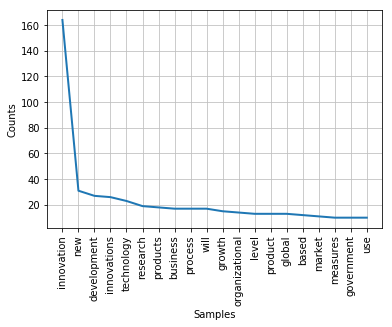

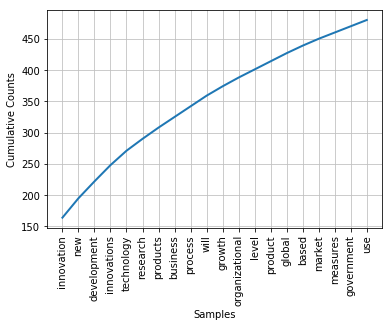

(True, True)

In [57]:
SC.plot(20), SC.plot(20, cumulative = True)

In [58]:
SC.tabulate(7)

 innovation         new development innovations  technology    research    products 
        164          31          27          26          23          19          18 


True

In [59]:
df = SC.to_pandas()

In [60]:
df.head()

,TF,Term,wTF
0,164,innovation,0.103470
3,31,new,0.019558
53,27,development,0.017035
27,26,innovations,0.016404
113,23,technology,0.014511


In [61]:
df.sort_values(by='wTF', ascending=False).head(10)

,TF,Term,wTF
0,164,innovation,0.103470
3,31,new,0.019558
53,27,development,0.017035
27,26,innovations,0.016404
113,23,technology,0.014511
122,19,research,0.011987
13,18,products,0.011356
17,17,business,0.010726
28,17,process,0.010726
150,17,will,0.010726


In [62]:
df.sort_values(by='wTF', ascending=False).tail(10)

,TF,Term,wTF
109,3,leading,0.001893
106,3,eventually,0.001893
105,3,sector,0.001893
101,3,left,0.001893
98,3,shockley,0.001893
96,3,silicon,0.001893
94,3,need,0.001893
90,3,within,0.001893
88,3,industries,0.001893
273,3,list,0.001893


In [63]:
print("The full list of terms ::>>")
#SC.list_terms()

The full list of terms ::>>


## 5. Stemming

In [64]:
SC.set_stemmer(STEMMER_FUNC)
SC.compute_stems()
#SC.stems

True

In [65]:
DF = SC.to_pandas()
DF.head()

,TF,Term,Stem,wTF
0,164,innovation,innov,0.103470
3,31,new,new,0.019558
53,27,development,develop,0.017035
27,26,innovations,innov,0.016404
113,23,technology,technolog,0.014511


## 6. Computing specificity of terms in a corpus with respect to a reference background corpus

In [66]:
help(Scoring)

Help on class Scoring in module omterms.measures:

class Scoring(builtins.object)
 |  The object given term frequency distribution of a foreground specific corpus and a background
 |  reference corpus, provides tools that help to compute specificity of each term in the foreground corpus.
 |  
 |  This kind of scoring is mainly to be used for the cases where an input text around a specific
 |  theme or topic is given. The process expects a tokenized, cleaned text with term counts.
 |  
 |  Note:
 |      It consumes a Corpus object and uses its methods and attributed and mutates it unless desired otherwise.
 |  
 |  Attributes:
 |      sCorpus (:obj:`Corpus`): A Corpus class instance of the specific corpus to be scored.
 |      rCorpus (:obj:`Corpus`): A Corpus class instance of the reference corpus.
 |      common (:obj:`list` of `str`): The common terms between the foreground and backgrouns corpus
 |      distinct (:obj:`list` of `str`): The terms observed in the foreground but not in 

### 6.1 Loading and preparing a reference corpus
For the demonstration purpose a NLTK's Brown corpus is used. 

However for a more sound comparison foreground corpus needs to a sample or a driven niche of the background corpus. In that respect full Wikipedia Corpus needs to be inetgrated into this work:

https://github.com/pavlobaron/wpcorpus
 

#### Loading

In [67]:
# For the first timers: uncomment the command below for an interaction download process
#nltk.download()
from nltk.corpus import brown
TOKENSREF = list(nltk.corpus.brown.words())

#### Cleaning

In [68]:
TOKENSREF_TF = run_cleaning_process(Cleaner, TOKENSREF,
                                    minL = MIN_LENGTH,
                                    minF = MIN_FREQ,
                                    notallowed = NOTALLOWED)

Cleaning process: Initial size of tokens = 1161192
Initial state:
Total term counts: 1161192
[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]
Removing panctuation only terms...
Total term counts: 1016830
[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]
Removing stopwords...
Total term counts: 526165
[('--', 3432),
 ('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125)]
Reduction due to punctuations and stopwords = 1111608.
Reduction due to all numeral terms = 1747
Reduction due to short terms = 178
Reduction due to rare terms = 27809
Reduction due to partially numeral terms = 49
Reduction due to terms with not allowed symbols = 645
The total term count reduction during this

#### Summary

Number of unique words = 19156
Number of words = 466940

Most frequents ::>>
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('people', 847),
 ('little', 831),
 ('state', 807),
 ('good', 806),
 ('make', 794),
 ('world', 787)]

Least frequents ::>>
[('quintus', 3),
 ('longue', 3),
 ('steels', 3),
 ('lovejoy', 3),
 ('fairview', 3),
 ('carraway', 3),
 ('peony', 3),
 ('ballplayers', 3),
 ('fudomae', 3),
 ('anthea', 3),
 ('herberet', 3),
 ('jennie', 3),
 ('pioneers', 3),
 ('poitrine', 3),
 ('bookies', 3),
 ('feeley', 3),
 ('crumb', 3),
 ('saleslady', 3),
 ('non-fiction', 3),
 ('quasimodo', 3)]


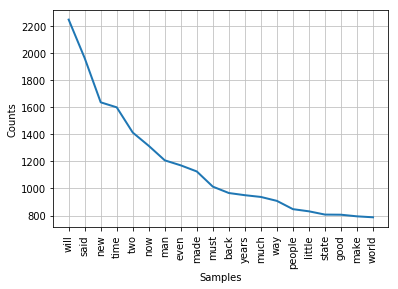

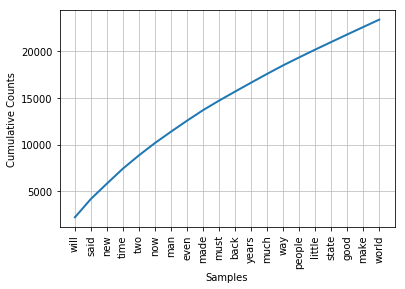

will said  new time  two  now  man 
2245 1961 1635 1598 1412 1314 1207 


In [69]:
CRef = Corpus(TOKENSREF_TF)
DF_Brown = summary_corpus(CRef)

In [70]:
DF_Brown.head(10)

,TF,Term,wTF
147,2245,will,0.004808
4,1961,said,0.004200
182,1635,new,0.003502
370,1598,time,0.003422
76,1412,two,0.003024
667,1314,now,0.002814
262,1207,man,0.002585
1181,1170,even,0.002506
398,1125,made,0.002409
344,1013,must,0.002169


#### Stemming

In [71]:
CRef = run_stemming_process(CRef, STEMMER_FUNC)
CRef.to_pandas().head()

Stemming the terms in the corpus ..
Done.


,TF,Term,Stem,wTF
147,2245,will,will,0.004808
4,1961,said,said,0.004200
182,1635,new,new,0.003502
370,1598,time,time,0.003422
76,1412,two,two,0.003024


#### Scoring

In [72]:
help(Scoring)

Help on class Scoring in module omterms.measures:

class Scoring(builtins.object)
 |  The object given term frequency distribution of a foreground specific corpus and a background
 |  reference corpus, provides tools that help to compute specificity of each term in the foreground corpus.
 |  
 |  This kind of scoring is mainly to be used for the cases where an input text around a specific
 |  theme or topic is given. The process expects a tokenized, cleaned text with term counts.
 |  
 |  Note:
 |      It consumes a Corpus object and uses its methods and attributed and mutates it unless desired otherwise.
 |  
 |  Attributes:
 |      sCorpus (:obj:`Corpus`): A Corpus class instance of the specific corpus to be scored.
 |      rCorpus (:obj:`Corpus`): A Corpus class instance of the reference corpus.
 |      common (:obj:`list` of `str`): The common terms between the foreground and backgrouns corpus
 |      distinct (:obj:`list` of `str`): The terms observed in the foreground but not in 

In [73]:
myScoring = Scoring(SC,CRef)
SCored = copy.deepcopy(myScoring.sCorpus)
DF = SCored.to_pandas()

259 / 274  raw term matches found.
Identifying specificity score for each matched terms...
15 / 274 non-raw match found.
Identifying specifificity score for stem matches...
6 stems matched.
Forming prediction model for non-matching terms...
The minimum score used for the modelling = 1.0
Computing specificity score for frequent distinct terms...
All phases are done!


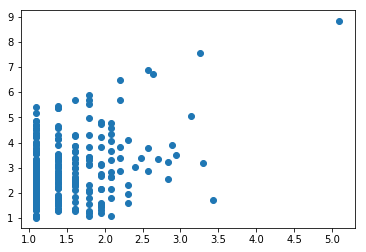

True

In [74]:
myScoring.plot(threshold = 1.0, islog = True)

In [75]:
myScoring.get_scores_by('stem')

{'technologies': 3.8773275912487817,
 'innovate': 5.367162631309513,
 'competitiveness': 2.9340810493860987,
 'innovative': 5.367162631309513,
 'foundational': 3.526132113074675,
 'funding': 2.4211300263077944}

In [76]:
myScoring.get_scores_by('noref')

{'insead': 2.5728010052549894,
 'silicon': 2.5728010052549894,
 'macro': 2.5728010052549894,
 'finland': 2.9841738613304125,
 'organisation': 2.5728010052549894,
 'shockley': 2.5728010052549894,
 'drucker': 2.5728010052549894,
 'bloomberg': 2.5728010052549894,
 'huebner': 2.9841738613304125}

## 7. Exporting topic specific data

In [77]:
csvfile_name = OUTPUT_FOLDER + OUTPUT_FNAME_PREFIX + ".csv"
with open(csvfile_name, 'w') as csvfile:
    DF.to_csv(csvfile_name)

In [78]:
print(csvfile_name)

./output/Innovation.csv


###  Exporting part of data

#### Selecting a specific range of scores

Note that with the function below a specific slice between a mix and max value can be determined. Besides, the filterin can be applied to any column as long as its data type is a number.


In [79]:
DF.head()

,TF,Term,Stem,wTF,SType,Score,wTFref
0,164,innovation,innov,0.103470,raw,8.839573,0.000015
27,26,innovations,innov,0.016404,raw,7.557419,0.000009
86,13,global,global,0.008202,raw,6.864271,0.000009
47,14,organizational,organiz,0.008833,raw,6.715236,0.000011
189,9,user,user,0.005678,raw,6.496547,0.000009


In [80]:
min_t = 4
aslice = pandas_filter_rows(DF, col = 'Score', min_t = min_t)
reduced = '_min{}'.format(min_t)
filtered_csvfile_name = OUTPUT_FOLDER + OUTPUT_FNAME_PREFIX + reduced + ".csv"
aslice.to_csv(filtered_csvfile_name)
print(filtered_csvfile_name)

./output/Innovation_min4.csv


In [81]:
#%connect_info